# Homework 5 Solutions
## FINM 36700 - 2023

Tobias Rodriguez del Pozo
tobiasdelpozo@uchicago.edu

### HBS Case
#### *Smart Beta Exchange-Traded Funds and Factor Investing*

# 1

## 1.1 Describe how each of the factors (other than MKT) is measured.1That is, each factor is a portfolio of stocks–which stocks are included in the factor portfolio?

- Size Factor (Small minus Big -- SMB). Small cap minus big cap. Split stocks into 5 quantiles, long smallest quantile and short largest quantile (by market cap).
- Value Factor (High minus Low -- HML). High book-to-market ratio minus low book-to-market ratio. Split stocks into 5 quantiles, long highest quantile and short lowest quantile (by book-to-market ratio).
- Quality Factor (Robust minus Weak -- RMW). Robust operating profitability minus weak operating profitability. Split stocks into 5 quantiles, long highest quantile and short lowest quantile (by operating profitability).
- Investment Factor (Conservative minus Aggressive -- CMA). Conservative investment minus aggressive investment. Split stocks into 5 quantiles, long lowest quantile and short lowest highest (by investment).
#### CMA just another kind of HML value factor (so high correlation), sometimes can drop CMA
- Momentum (Up minus Down -- UMD). Up minus down. Split stocks into 5 quantiles, long highest quantile and short lowest quantile (by returns in previous year).
#### MKT market factor: 如果不是long-short strategy, 则会highly correlated with MKT ---> lose statistical power 

#### tangency portfolio's weight tells you which factor is useful in linear factor pricing model: 
- SMB (size factor) not significant, 因为现在所有人都知道了，所以就vanish，变得没有significance

## 1.2 Is the factor portfolio... 
- long-only
- long-short
- value-weighted
- equally-weighted

Long-short.

## 1.3 What steps are taken in the factor construction to try to reduce the correlation between the factors?

They do this by picking distinct metrics, and also going long-short, in order to control for the MKT variable. This combined with distinct metrics allows them to isolate the effect of the factor whilst maintaining low correlations to the other factors.

## 1.4 What is the point of figures 1-6?

Showing the difference in returns between the highest and lowest quantiles for the factors.

## 1.5 How is a “smart beta” ETF different from a traditional ETF?

From Page 9 of the case. Smart beta ETFs are a combination of passive and active investing. Whereas a passive ETF tracks an index, and is almost always long-only, a smart beta ETF will track a factor index, and will thus be long-short. This is compared to just market cap weighted ETFs (passive).

## 1.6 Is it possible for all investors to have exposure to the “value” factor?

No. From Page 9:

"For every value investor, who tilds towards or selects cheap value stocks, there must be an investor on the other side who is underweighting value and overweighting expensive, growth stocks. Hence as everything must add up to the market-weighted portfolio, everyone at once cannot hold or tild towards value at the same time."

Not everyone could trade value stock. If everyone know that longing stock make money，price goes up and it is no longer value stock anymore (cannot make profit)

if I short the value stock, someone must long the value stock at the same time. taking the opposite side 

#### for both value factor and momentum factor: someone must take the opposite

## 1.7 How does factor investing differ from traditional diversification?

We aren't doing MV-optimization. Rather, we are specifically trying to target a factor, not just maximize Sharpe. For example, if we look at page 13, we see that the weighting scheme used by Research Affiliates gives weights proportional to the value of the financial variable.





# 2

## 2.1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

pd.options.display.float_format = '{:,.4f}'.format

sys.path.append('../cmds/')

import TA_utils as ta

plt.style.use('ggplot')

from functools import partial
read_excel = partial(pd.read_excel, index_col=0, parse_dates=[0], io='../data/factor_pricing_data.xlsx')

factors = read_excel(sheet_name='factors (excess returns)')
portfolios = read_excel(sheet_name='portfolios (excess returns)')

In [2]:
full_sample = ta.calc_performance_metrics(factors).iloc[:, :3]
full_sample

Annualized Return  Annualized Volatility  Annualized Sharpe Ratio
MKT             0.0846                 0.1573                   0.5376
SMB             0.0112                 0.1005                   0.1115
HML             0.0253                 0.1102                   0.2299
RMW             0.0465                 0.0834                   0.5578
CMA             0.0325                 0.0734                   0.4428
UMD             0.0609                 0.1555                   0.3918

## 2.2

Yes, all have positive risk premia.

Annualized Return Pre  Annualized Volatility Pre  \
MKT                 0.0779                     0.1561   
SMB                 0.0160                     0.1011   
HML                 0.0379                     0.1028   
RMW                 0.0460                     0.0858   
CMA                 0.0400                     0.0696   
UMD                 0.0743                     0.1581   

     Annualized Sharpe Ratio Pre  Annualized Return Post  \
MKT                       0.4992                  0.1117   
SMB                       0.1583                 -0.0084   
HML                       0.3685                 -0.0258   
RMW                       0.5362                  0.0486   
CMA                       0.5751                  0.0018   
UMD                       0.4697                  0.0065   

     Annualized Volatility Post  Annualized Sharpe Ratio Post  
MKT                      0.1627                        0.6865  
SMB                      0.0983                       -0.0852  
HML                      0.1358                       -0.1901  
RMW                      0.0731                        0.6645  
CMA                      0.0870                        0.0206  
UMD                      0.1440                        0.0451

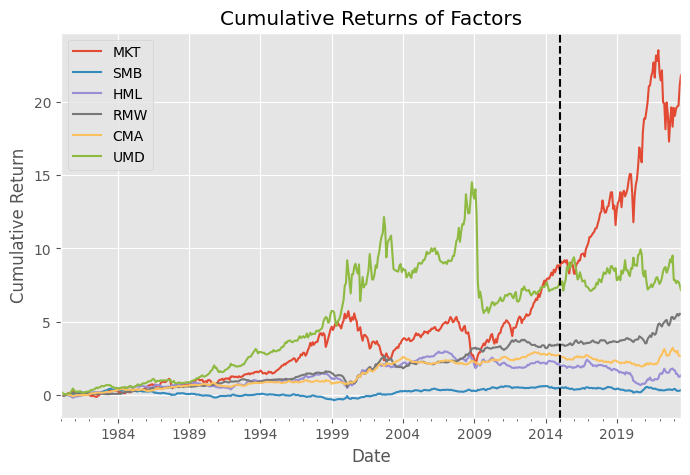

In [3]:
pre_case = ta.calc_performance_metrics(factors.loc[:'2014']).iloc[:, :3]
post_case = ta.calc_performance_metrics(factors.loc['2015':]).iloc[:, :3]

pre_post = pre_case.join(post_case, lsuffix=' Pre', rsuffix=' Post')
display(pre_post)

# Plot cumulative returns of factors, add vertical line at 2015
fig, ax = plt.subplots(figsize=(8, 5))
cum_rets = (1 + factors).cumprod() - 1
cum_rets.plot(ax=ax)
ax.axvline('2015', color='k', linestyle='--')
ax.set_title('Cumulative Returns of Factors')
ax.set_ylabel('Cumulative Return')
ax.set_xlabel('Date');

MKT has done by far the best, and has been soaring up compared to the other factors, especially after the case. UMD has stayed around flat after the case, although it did well before the case. SMB and HML go from positive expected returns to negative.

Overall, all of the factors except MKT and RML do worse after the case than before the case.

## 2.3

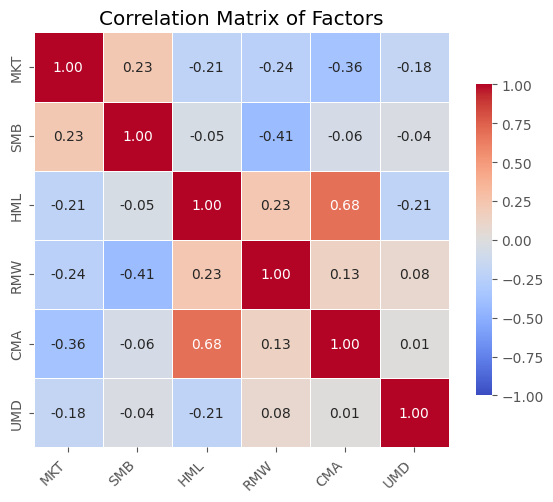

In [4]:
fig, ax = plt.subplots(figsize=(6, 5))
ax = ta.plot_correlation_matrix(factors.corr(), ax=ax)
ax.set_title('Correlation Matrix of Factors')
fig.tight_layout()

a.

With the exception of HML and CMA, which has a correlation of 0.68, all of the factors have quite low correlations. Moreover, a lot of them have negative correlations, which is interesting. RMW and SMB also have a -0.41 correlation, which is somewhat high.

b.

I would say so. Given the high correlation HML has to CMA and moderate correlation is has to RMW then it is likely that HML is picking up on something similar to CMA. So, out of all of the factors, it could be the most redundant.

## 2.4## 2.4

In [5]:
def tangency_weights(returns,dropna=True,scale_cov=1):
    if dropna:
        returns = returns.dropna()

    covmat_full = returns.cov()
    covmat_diag = np.diag(np.diag(covmat_full))
    covmat = scale_cov * covmat_full + (1-scale_cov) * covmat_diag

    weights = np.linalg.solve(covmat,returns.mean())
    weights = weights / weights.sum()

    return pd.DataFrame(weights, index=returns.columns,columns=['Weight'])

w_tan = tangency_weights(factors)
w_tan.join(full_sample).sort_values('Annualized Return', ascending=False)

Weight  Annualized Return  Annualized Volatility  Annualized Sharpe Ratio
MKT  0.2039             0.0846                 0.1573                   0.5376
UMD  0.0938             0.0609                 0.1555                   0.3918
RMW  0.3074             0.0465                 0.0834                   0.5578
CMA  0.3693             0.0325                 0.0734                   0.4428
HML -0.0618             0.0253                 0.1102                   0.2299
SMB  0.0874             0.0112                 0.1005                   0.1115

a.

CMA and RMW have the highest weights, incidating that they are the most important. HML and SMB have the lowest weights, indicating that they are the least important.

b.

Yes, note that CMA and RMW have the highest weights, but definitely do not have the highest mean returns. Both MKT and UMD have better mean returns, but lower weights. This again goes back to the fact that when doing MV-optimization, we are not just looking at mean returns, but also covariances.

c.

In [6]:
factors_sub = factors[['MKT', 'SMB', 'HML', 'UMD']]

w_tan_sub = tangency_weights(factors_sub)
w_tan_sub

Weight
MKT  0.3564
SMB -0.0062
HML  0.3489
UMD  0.3009

Now MKT, HML, and UMB all have roughly equal and high weights, and SMB has virtually 0 weight. SO, I would conclude that SMB is probably not super important, and that MKT, HML, and UMB are all important.

# 3

## 3.1

a.

In [7]:
from collections import defaultdict
from itertools import product
import statsmodels.api as sm

summary = defaultdict(list)
capm = sm.add_constant(factors['MKT'])
aqr = sm.add_constant(factors[['MKT', 'HML', 'RMW', 'UMD']])
ff3 = sm.add_constant(factors[['MKT', 'SMB', 'HML']])
ff5 = sm.add_constant(factors[['MKT', 'SMB', 'HML', 'RMW', 'CMA']])

col_names = product(['CAPM', 'AQR', 'FF3', 'FF5'], ['Alpha', 'R^2'])
col_names = list(map(lambda x: ' '.join(x), col_names))

summary = pd.DataFrame(0, index=portfolios.columns, columns=col_names)

models = [*zip(['CAPM', 'AQR', 'FF3', 'FF5'], [capm, aqr, ff3, ff5])]

for asset in portfolios.columns:
    asset_ret = portfolios[asset]
    for name, X in models:
        model = sm.OLS(asset_ret, X).fit()
        summary.loc[asset, f'{name} Alpha'] = model.params[0]
        summary.loc[asset, f'{name} R^2'] = model.rsquared
        

summary[['AQR Alpha', 'AQR R^2']]

AQR Alpha  AQR R^2
Agric     0.0008   0.3413
Food      0.0010   0.4711
Soda      0.0016   0.3072
Beer      0.0020   0.4267
Smoke     0.0029   0.2726
Toys     -0.0027   0.5103
Fun       0.0026   0.6173
Books    -0.0025   0.6897
Hshld    -0.0005   0.5603
Clths    -0.0010   0.6318
Hlth     -0.0031   0.4448
MedEq     0.0020   0.6001
Drugs     0.0026   0.5033
Chems    -0.0019   0.7483
Rubbr     0.0004   0.6466
Txtls    -0.0024   0.5578
BldMt    -0.0023   0.7589
Cnstr    -0.0029   0.6352
Steel    -0.0021   0.6310
FabPr    -0.0017   0.4200
Mach     -0.0001   0.7532
ElcEq     0.0003   0.7451
Autos     0.0012   0.5551
Aero     -0.0007   0.6013
Ships    -0.0035   0.5058
Guns      0.0001   0.3356
Gold      0.0002   0.0504
Mines    -0.0016   0.4651
Coal     -0.0029   0.2210
Oil      -0.0019   0.4659
Util      0.0004   0.3570
Telcm     0.0005   0.5892
PerSv    -0.0044   0.5822
BusSv    -0.0000   0.8529
Hardw     0.0035   0.6695
Softw     0.0056   0.7387
Chips     0.0052   0.7536
LabEq     0.0025   0.7377
Paper    -0.0031   0.6767
Boxes     0.0002   0.5862
Trans    -0.0014   0.7074
Whlsl    -0.0011   0.7568
Rtail     0.0016   0.6835
Meals     0.0002   0.6430
Banks    -0.0019   0.7720
Insur    -0.0007   0.6853
RlEst    -0.0047   0.6036
Fin       0.0015   0.8130
Other    -0.0038   0.5959

b.

In [8]:
summary.loc[:, summary.columns.str.contains('Alpha')].abs().mean().to_frame('MAE') * 12

MAE
CAPM Alpha 0.0206
AQR Alpha  0.0230
FF3 Alpha  0.0242
FF5 Alpha  0.0313

They are all pretty big, around 2\% annualized. The biggest one is for the FF5, and the lowest is for the vanilla CAPM. 

This does not support the pricing model. We could also run a t-test to see if the difference is statistically significant.

## 3.3

It's hard to say. All of the models perform worse than the CAPM, so in some sense the only important factor is MKT. However, AQR performs second best, which further indicates that HML or CMA are redundant and should not be used. Yes, Fama and French should probably add the momentum factor to their model.

## 3.4

In [9]:
summary.loc[:, ~summary.columns.str.contains('Alpha')].mean().to_frame('R^2')

R^2
CAPM R^2 0.5281
AQR R^2  0.5771
FF3 R^2  0.5725
FF5 R^2  0.5975

Not particularly. They only explain about 50-60% of the variation. This indicates moderately low explainability of excess returns by decomposition on different factor models. Thus the factors may not be considered good in a Linear Factor Decomposition of the assets.

## 3.5

a.

In [10]:
def calc_pricing_regression(rets, factors, intercept=True, adj=12):
    if intercept:
        factors = sm.add_constant(factors)
    summary = {f'{k} Beta': [] for k in factors.columns[1:]}
    summary['Alpha']  = []
    summary['R^2']    = []
    for asset in rets.columns:
        model = sm.OLS(rets[asset], factors).fit()
        for k, _ in summary.items():
            try:
                summary[k].append(model.params[k[:-5]])
            except:
                pass
        summary['R^2'].append(model.rsquared)
        summary['Alpha'].append(model.params[0] * adj)
            
    return pd.DataFrame(summary, index=rets.columns)

def calc_cross_sectional_regression(mean_rets, betas, intercept=False):
    if intercept:
        betas = sm.add_constant(betas)
    model = sm.OLS(mean_rets, betas).fit()
    params = model.params.to_frame('Cross Sectional Regression')
    params.loc['R^2'] = model.rsquared
    params.loc['MAE'] = model.resid.abs().mean() 
    return params

frames = []

ts_premia = portfolios.mean() * 12

for name, X in zip(['CAPM', 'AQR', 'FF3', 'FF5'], [capm, aqr, ff3, ff5]):
    pricing_regr = calc_pricing_regression(portfolios, X, intercept=False)
    res = calc_cross_sectional_regression(ts_premia, pricing_regr.iloc[:, :-2], intercept=False)
    res = res.rename({'Cross Sectional Regression': f'{name} CS'}, axis=1)
    frames.append(res)

summary_cs = pd.concat(frames, axis=1).fillna('')

# Move R^2 and MAE to the top
summary_cs = pd.concat([summary_cs.loc[['R^2', 'MAE']], summary_cs.drop(['R^2', 'MAE'])])
summary_cs_betas = summary_cs[summary_cs.index.str.contains('Beta')].copy()
summary_cs_betas.loc[:, 'Time Series'] = factors.mean().values * 12
summary_cs_betas

CAPM CS  AQR CS  FF3 CS  FF5 CS  Time Series
MKT Beta  0.0857  0.0876  0.1016  0.0957       0.0846
HML Beta         -0.0398 -0.0175 -0.0335       0.0112
RMW Beta          0.0444          0.0359       0.0253
UMD Beta          0.0534                       0.0465
SMB Beta                 -0.0646 -0.0577       0.0325
CMA Beta                         -0.0152       0.0609

For MKT, they don't differ that much. Likewise, for UMD and RMW, there isn't a huge difference. However, for SMB, HML, and CMA, there is a big difference, where a lot of the estimated premia are negative!

b.

In [11]:
import warnings
warnings.filterwarnings('ignore')

alpha_mae = summary.loc[:, summary.columns.str.contains('Alpha')].abs().mean().to_frame('MAE') * 12

cs_mae = summary_cs.loc[['MAE']].T

# Append it row-wise
mae = alpha_mae.append(cs_mae)
mae

MAE
CAPM Alpha 0.0206
AQR Alpha  0.0230
FF3 Alpha  0.0242
FF5 Alpha  0.0313
CAPM CS    0.0207
AQR CS     0.0164
FF3 CS     0.0150
FF5 CS     0.0130

They are for the most part smaller than the time-series MAE, with the notable exception of CAPM, which is very slightly higher.

### Time-series test vs. Cross-sectional test
- time series test: fits the asset, insist the factor premia for each factor are sample averages, only requires Alpha, R^2 not important 
- cross sectional test: fits the asset looser, let factor premia (lambda) be whatever value to fit the model better, cares about R^2

#### time series test has higher error with more parameters 
time-series test has higher error 因为harder to fit with multiple parameters

(no garantee alpha must be zero, no garantee do better in time series test when num of parameters increase) 

#### cross sectional test has lower error, higher R^2 with more parameters
fit the data better when number of parameters increase，因为可以随意组合，取任意值


